In [1]:
# - A test harness can be created to compare multiple different machine learning algorithms in 
# Python with scikit-learn.

In [2]:
# 13.1 Choose the Best Machine Learning Model

In [3]:
# - When you have a new dataset, it is a good idea to visualize the data using different techniques 
# in order to look at the data from different perspectives. 

# - The same idea applies to model selection. You should use a number of different ways of looking 
# at the estimated accuracy of your machine learning algorithms in order to choose the one or two 
# algorithm to finalize. 

# - A way to do this is to use visualization methods to show the average accuracy, variance and 
# other properties of the distribution of model accuracies.

In [4]:
# 13.2 Compare Machine Learning Algorithms Consistently

In [5]:
# - The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is 
# evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be 
# evaluated on a consistent test harness.

In [6]:
from pandas import read_csv

In [7]:
import numpy

In [8]:
import sys

In [9]:
def print_data(_data):
    return numpy.savetxt(sys.stdout, _data[:5,:], '%5.3f')

In [10]:
_uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

In [11]:
_col_names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

In [12]:
_dataframe = read_csv(_uri, names=_col_names)

In [13]:
_array = _dataframe.values

In [14]:
print_data(_array)

6.000 148.000 72.000 35.000 0.000 33.600 0.627 50.000 1.000
1.000 85.000 66.000 29.000 0.000 26.600 0.351 31.000 0.000
8.000 183.000 64.000 0.000 0.000 23.300 0.672 32.000 1.000
1.000 89.000 66.000 23.000 94.000 28.100 0.167 21.000 0.000
0.000 137.000 40.000 35.000 168.000 43.100 2.288 33.000 1.000


In [15]:
_X = _array[:,0:8]

In [16]:
print_data(_X)

6.000 148.000 72.000 35.000 0.000 33.600 0.627 50.000
1.000 85.000 66.000 29.000 0.000 26.600 0.351 31.000
8.000 183.000 64.000 0.000 0.000 23.300 0.672 32.000
1.000 89.000 66.000 23.000 94.000 28.100 0.167 21.000
0.000 137.000 40.000 35.000 168.000 43.100 2.288 33.000


In [17]:
_Y = _array[:,8:]

In [18]:
print_data(_Y)

1.000
0.000
1.000
0.000
1.000


In [19]:
_Y = numpy.ravel(_Y)

In [20]:
print(_Y[:5])

[ 1.  0.  1.  0.  1.]


In [21]:
from sklearn.model_selection import KFold

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
from sklearn.svm import SVC

In [29]:
_models = []

In [30]:
_models.append(('LR', LogisticRegression()))

In [31]:
_models.append(('LDA', LinearDiscriminantAnalysis()))

In [32]:
_models.append(('KNN', KNeighborsClassifier()))

In [33]:
_models.append(('CART', DecisionTreeClassifier()))

In [34]:
_models.append(('NB', GaussianNB()))

In [35]:
_models.append(('SVM', SVC()))

In [36]:
_scoring = 'accuracy'

In [37]:
_scores = []

In [38]:
_names = []

In [39]:
for _name, _model in _models:
    _kfold=KFold(n_splits=10, random_state=7)
    _score = cross_val_score(_model, _X, _Y, cv=_kfold, scoring=_scoring)
    _scores.append(_score)
    _names.append(_name)
    print('{}: {:.3%}, {:.3%}'.format(_name, _score.mean(), _score.std()))

LR: 76.951%, 4.841%
LDA: 77.346%, 5.159%
KNN: 72.656%, 6.182%
CART: 70.039%, 6.713%
NB: 75.518%, 4.277%
SVM: 65.103%, 7.214%


In [40]:
from matplotlib import pyplot

In [41]:
_fig = pyplot.figure()

In [42]:
_fig.suptitle('Algorithm Comparison')

In [43]:
_ax = _fig.add_subplot(111)

In [44]:
pyplot.boxplot(_scores)

{'boxes': [<matplotlib.lines.Line2D at 0x11c13cd68>,
 'caps': [<matplotlib.lines.Line2D at 0x11c14dfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c162ef0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c162080>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10b926748>,
  <matplotlib.lines.Line2D at 0x11c1ccc18>]}

In [45]:
_ax.set_xticklabels(_names)

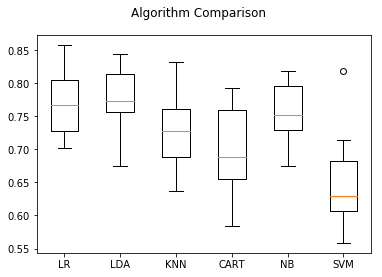

In [46]:
pyplot.show()

In [47]:
# - From these results, it would suggest that both logistic regression and linear discriminant analysis
# are perhaps worthy of further study on this problem.